<a href="https://colab.research.google.com/github/marco-milanesi/dynamic-weighing/blob/main/CORR_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pesatura Dinamica

In [54]:
!wget https://raw.githubusercontent.com/EdoGitMira/Gruppo_H_pesatura_dinamica/main/dataset/velocit%C3%A0%20separate%20numeri%20cartelle%20e%20frequenza/dataset_interval_35_num_v1v4_f.csv

--2022-02-12 17:19:39--  https://raw.githubusercontent.com/EdoGitMira/Gruppo_H_pesatura_dinamica/main/dataset/velocit%C3%A0%20separate%20numeri%20cartelle%20e%20frequenza/dataset_interval_35_num_v1v4_f.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695190 (679K) [text/plain]
Saving to: ‘dataset_interval_35_num_v1v4_f.csv.3’

dataset_interval_35 100%[===================>] 678.90K  --.-KB/s    in 0.04s   

2022-02-12 17:19:39 (15.1 MB/s) - ‘dataset_interval_35_num_v1v4_f.csv.3’ saved [695190/695190]



# Linear Regression

## Import packages


In [55]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

## Loading Data

In [56]:
data = pd.read_csv('dataset_interval_35_num_v1v4_f.csv',sep=';')
print("Loaded: ",len(data))
y = data.values[:,2]
x = data.values[:,4:]
data

Loaded:  1171


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0,0,0.940722,80,0.935596,0.936663,0.944824,0.952803,0.920184,0.957204,0.926925,0.952237,0.933084,0.946302,0.934464,0.938687,0.947775,0.931093,0.950892,0.932845,0.949390,0.931644,0.941824,0.941287,0.935917,0.949336,0.938422,0.934511,0.935075,0.951714,0.932789,0.944772,0.944424,0.924509,0.942482,0.953559,0.933597,0.940206,0.946579,76.804916
1,1,0,0.940724,80,0.943803,0.935807,0.943463,0.941202,0.938887,0.950505,0.922220,0.949632,0.940743,0.941312,0.940029,0.942932,0.933756,0.935631,0.952529,0.933573,0.937700,0.954188,0.920210,0.943983,0.951280,0.932553,0.944624,0.941179,0.941266,0.918881,0.969909,0.922298,0.945433,0.947682,0.929625,0.934897,0.956945,0.934661,0.930068,76.804916
2,2,0,0.940726,80,0.942182,0.951523,0.924894,0.950180,0.936838,0.938504,0.947151,0.939942,0.938525,0.939031,0.943978,0.939202,0.939511,0.941848,0.941714,0.930200,0.949316,0.932576,0.946623,0.935926,0.949646,0.928487,0.940488,0.950085,0.927980,0.954548,0.934965,0.938117,0.929083,0.961541,0.926316,0.946656,0.943754,0.929469,0.938328,76.804916
3,3,0,0.940727,80,0.938316,0.932169,0.953388,0.930458,0.950491,0.932246,0.949842,0.932153,0.943395,0.939614,0.944757,0.932863,0.944976,0.939592,0.927416,0.960383,0.931306,0.942980,0.942225,0.937094,0.930790,0.953658,0.936131,0.937237,0.948611,0.931054,0.932941,0.957936,0.928216,0.946474,0.943470,0.931229,0.937927,0.951027,0.930477,80.645161
4,4,0,0.940729,80,0.939312,0.942221,0.938552,0.948945,0.924629,0.945271,0.943566,0.936438,0.943977,0.942199,0.935912,0.930746,0.961569,0.926340,0.944125,0.947488,0.928150,0.935517,0.954217,0.933627,0.936955,0.953147,0.926843,0.935584,0.955061,0.934359,0.934930,0.952408,0.931290,0.927174,0.959360,0.937519,0.933861,0.953529,0.930874,76.804916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,1166,39,1.229075,45,1.214898,1.233261,1.235676,1.220389,1.219226,1.224368,1.237462,1.240882,1.222111,1.223108,1.229316,1.230003,1.231844,1.229466,1.228932,1.231176,1.227190,1.224987,1.226895,1.232313,1.225629,1.225676,1.231018,1.229643,1.226912,1.227919,1.227881,1.227890,1.227454,1.230531,1.232347,1.228330,1.225901,1.228977,1.225322,201.612903
1167,1167,39,1.229070,45,1.217845,1.215770,1.224287,1.240585,1.237143,1.217745,1.216251,1.236290,1.245570,1.220256,1.210690,1.226403,1.240276,1.234145,1.219908,1.226427,1.229864,1.225057,1.233428,1.226672,1.227467,1.234853,1.228993,1.224669,1.229589,1.230410,1.230114,1.225770,1.225528,1.229197,1.231355,1.231428,1.226891,1.227386,1.226202,179.211470
1168,1168,39,1.229066,45,1.228456,1.237786,1.228470,1.215433,1.227330,1.236764,1.231966,1.218055,1.220533,1.226176,1.231416,1.232191,1.219014,1.230131,1.234779,1.225727,1.224967,1.229415,1.230513,1.228652,1.227112,1.230353,1.229491,1.224740,1.229199,1.232686,1.225906,1.230158,1.226204,1.227411,1.230920,1.227649,1.225386,1.231262,1.231019,146.627566
1169,1169,39,1.229061,45,1.223910,1.217249,1.223312,1.240660,1.232546,1.219996,1.224494,1.230946,1.224140,1.226375,1.235887,1.226541,1.225827,1.233740,1.228980,1.222373,1.227088,1.224740,1.228821,1.231144,1.228977,1.226420,1.228080,1.228080,1.229349,1.225522,1.229616,1.227886,1.228088,1.229251,1.228744,1.228432,1.226365,1.227357,1.228413,161.290323


# PCA

Total Variance in our dataset is:  3777.6332977281327
The 95% variance we want to have is:  3588.751632841726

Variance explain with 2 components:  3777.6209632393357
Variance explain with 5 components:  3777.6248804384163
Variance explain with 10 components:  3777.6280817116585
Variance explain with 12 components:  3777.628986960299
Variance explain with 18 components:  3777.6310195497554
Variance explain with 20 components:  3777.631545520871


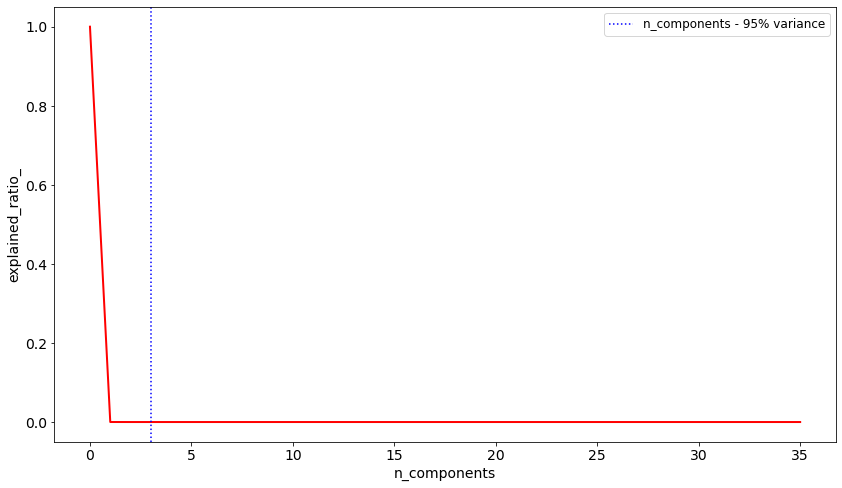

In [57]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = x.shape[1]

pca = PCA(n_components=n_components, random_state=453)
x_r = pca.fit(x).transform(x)

total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ",total_variance)
var_95 = total_variance*0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0,n_components),pca.explained_variance_)
a = pd.DataFrame(a,columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95 %
print("Variance explain with 2 components: ", sum(a["Explained Variance"][0:2]))
print("Variance explain with 5 components: ", sum(a["Explained Variance"][0:5]))
print("Variance explain with 10 components: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 12 components: ", sum(a["Explained Variance"][0:12]))
print("Variance explain with 18 components: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 20 components: ", sum(a["Explained Variance"][0:20]))



# Plotting the data
plt.figure(1, figsize=(14,8))
plt.plot(pca.explained_variance_ratio_,linewidth=2, c='r')
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95 %
plt.axvline(3,linestyle=':', label='n_components - 95% variance',c = 'blue')
plt.legend(prop=dict(size=12))
plt.show()            
            
            

## Running PCA again

In [58]:
pca_new = PCA(n_components=6, random_state=453)
x_r = pca_new.fit(x).transform(x)


## Scree plot

In [59]:
explained_variance = pca_new.explained_variance_ratio_

import numpy as np
import plotly.express as px

explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000e+00,0.0
1,PC1,9.999221e-01,1.0
2,PC2,7.466087e-05,1.0
3,PC3,3.965389e-07,1.0
4,PC4,3.505010e-07,1.0
5,PC5,2.899011e-07,1.0
6,PC6,2.202212e-07,1.0


In [60]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

### Save the figure

In [61]:
#%%capture
#!pip install kaleido
#!pip install plotly>=4.0.0
#!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
#!chmod +x /usr/local/bin/orca
#!apt-get install xvfb libgtk2.0-0 libgconf-2-4

#import os

#if not os.path.exists("images"):
#    os.mkdir("images")

#fig.write_image("images/fig1.svg")

## Train test and split

In [ ]:
from collections import Counter
print("Labels distribution:",Counter(y))

# train-test split

# In case of PCA is used change x to x_r
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=10,train_size=0.5)
print("Train labels distribution:", Counter(y_train))
print("Test labels distribution:",Counter(y_test))


In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(585, 36)
(586, 36)
(585,)
(586,)


## Train the model

In [64]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict test results

In [65]:
y_pred = ml.predict(x_test)

y = β0 + β1 · x1 +  β2 · x2 + ... + βn · xn

## Change units to have the weight in grams

In [66]:
m = 5191420.51
std_m = 639.702
q = -4874.38
std_q = 0.3818

std_tot = 0.3818
MSE_statica = 0.1458

y_pred_g = m*(y_pred/1000) + q
y_test_g = m*(y_test/1000) + q


## Evaluate the model

In [78]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,y_pred)

from sklearn.metrics import mean_squared_error
import math

MSE_regressor = (mean_squared_error(y_test_g, y_pred_g)*y_test_g.shape[0])/(y_test_g.shape[0] -2)
RMSE_regressor = math.sqrt(MSE_regressor)

RMSE_tot = math.sqrt(MSE_regressor + MSE_statica)
print("RMSE Regressore: " + str(round(RMSE_regressor,4)) + "\t \t" + "RMSE totale: " + str(round(RMSE_tot,4)) + "\t \t" + "R^2 :" + str(r2_score))

RMSE Regressore: 2.6005	 	RMSE totale: 2.6284	 	R^2 :0.9999714043269


## Plot the results

### Reproduce scikit-learn results with linear algebra

In [68]:
N = len(x_test)
p = x_test.shape[1] + 1


In [69]:
X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = x_test

In [70]:
beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y_test


In [71]:
import statsmodels.api as sm
ols = sm.OLS(y_test, X_with_intercept)
ols_result = ols.fit()

std = ols_result.bse
coefficient = print(ols_result.params)
norm=0
for el in std:
  norm+=math.pow(el,2)
print(math.sqrt(norm))
print(std)

[-6.39408071e-04  1.79860884e-03  2.13441628e-03 -7.13128011e-04
  1.01952414e-03  3.39127537e-03  7.52217329e-03  1.11162564e-02
  1.30953869e-02  1.69379390e-02  1.97328259e-02  2.49578810e-02
  2.83387146e-02  2.80539711e-02  2.93243130e-02  3.32836321e-02
  3.53590469e-02  3.59094598e-02  3.94004430e-02  4.47938123e-02
  4.55957000e-02  4.70673753e-02  4.43519509e-02  4.66449300e-02
  4.95208611e-02  5.07479770e-02  4.45257716e-02  4.19195975e-02
  4.24045173e-02  4.79997662e-02  4.85403757e-02  3.67397997e-02
  2.53978414e-02  1.97992732e-02  1.91472705e-02  1.56703907e-02
 -3.92392569e-06]
0.013952548808276493
[2.29255857e-04 7.79248233e-04 1.26570645e-03 1.59353474e-03
 1.73311054e-03 1.75760785e-03 1.75560303e-03 1.62226854e-03
 1.74139091e-03 1.88406904e-03 1.93670236e-03 1.80386194e-03
 2.09853040e-03 2.29582951e-03 2.35238895e-03 2.60519801e-03
 2.73432581e-03 2.67987387e-03 2.57225202e-03 2.34241905e-03
 2.19767112e-03 2.12044426e-03 2.21190126e-03 2.43728259e-03
 2.4436171

In [72]:
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.971e+05
Date:                Sat, 12 Feb 2022   Prob (F-statistic):               0.00
Time:                        17:19:41   Log-Likelihood:                 3701.1
No. Observations:                 586   AIC:                            -7328.
Df Residuals:                     549   BIC:                            -7166.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -2.789      0.0

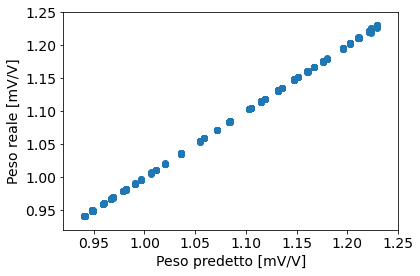

In [73]:
plt.scatter(y_test,y_pred)
plt.rcParams.update({'font.size': 14})
plt.xlim(0.92,1.25)
plt.ylim(0.92,1.25)
plt.xlabel('Peso predetto [mV/V]')
plt.ylabel('Peso reale [mV/V]')

# Save the figure
plt.savefig("reale-predetto.pdf")